**Acknowledgements:**
* [🎬🍿NETFLIX MOVIES AND TV SHOWS EDA📊](https://www.kaggle.com/code/bhartiprasad17/netflix-movies-and-tv-shows-eda)
* [EDA 📊 Beginner to Expert 📈 Plotly](https://www.kaggle.com/code/andreshg/eda-beginner-to-expert-plotly)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

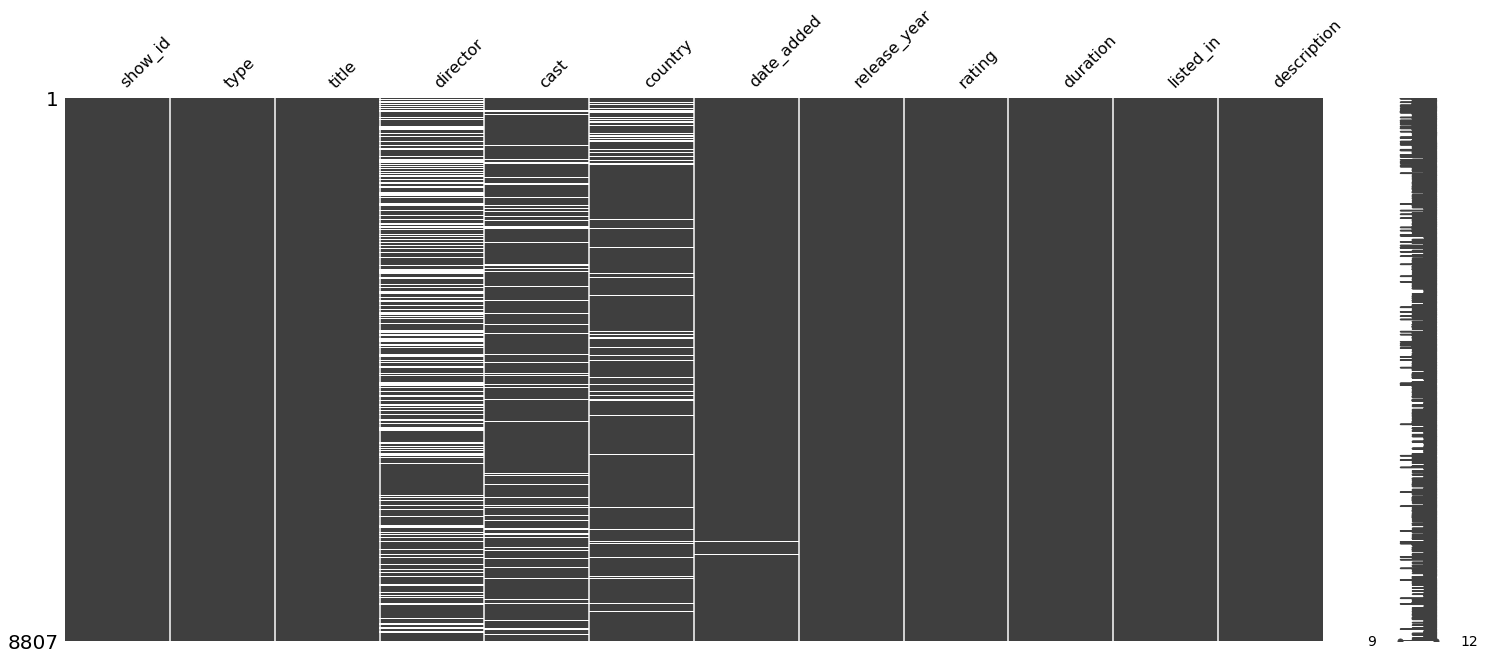

In [5]:
# Visualize missing values as a matrix
msno.matrix(df);

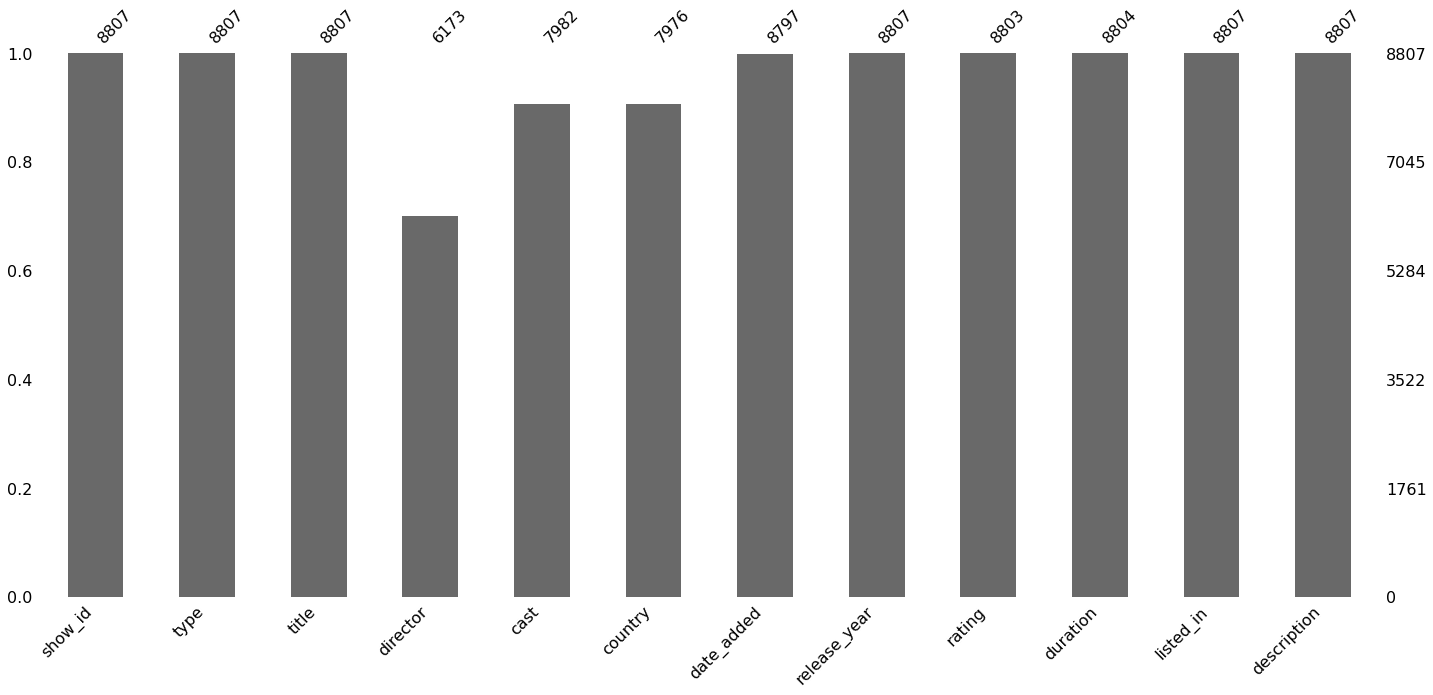

In [6]:
# Visualize the number of missing values as a bar chart
msno.bar(df);

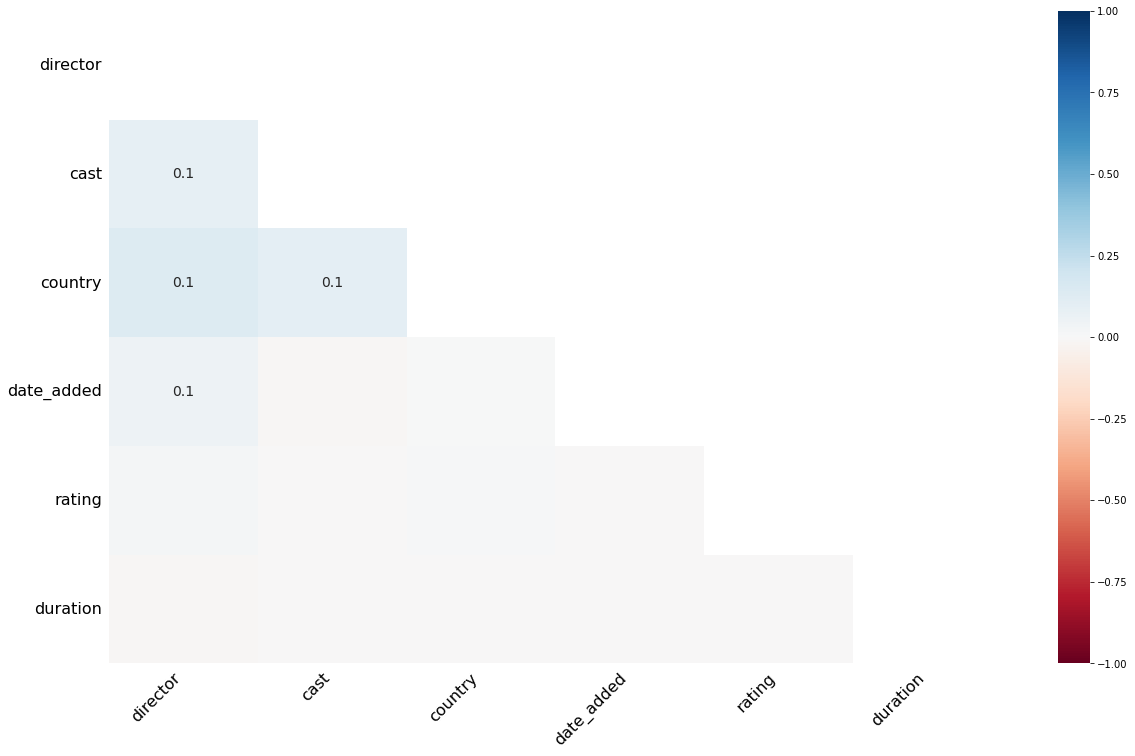

In [7]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(df);

In [8]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,3)))

director's null rate :29.908%
cast's null rate :9.368%
country's null rate :9.436%
date_added's null rate :0.114%
rating's null rate :0.045%
duration's null rate :0.034%


In [9]:
df = df.drop(['director', 'cast','country'], axis=1)
df.columns

Index(['show_id', 'type', 'title', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df[df["rating"].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [11]:
df[df['date_added'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
df[df['duration'].isna()]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
df=df[df["rating"].notna()]
df=df[df["date_added"].notna()]
df=df[df["duration"].notna()]

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
ratings_age = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_age)

<AxesSubplot:xlabel='target_age', ylabel='count'>

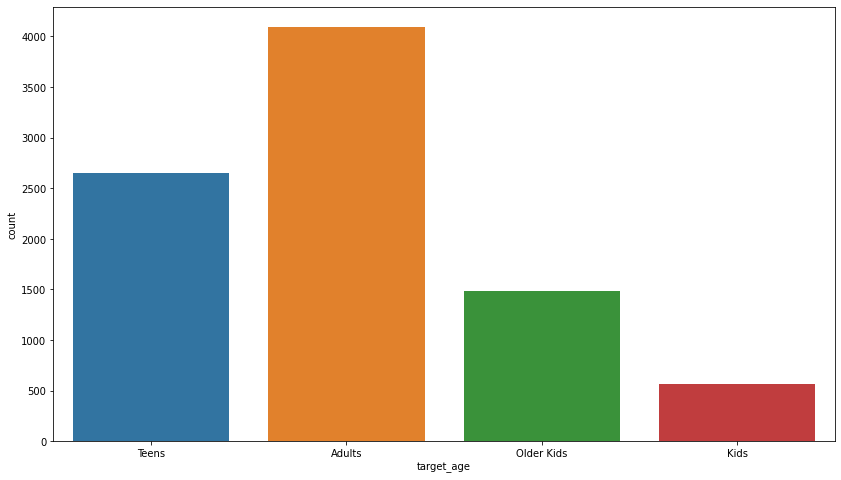

In [17]:
plt.figure(figsize = (14,8))
sns.countplot(x='target_age',data = df)

<AxesSubplot:xlabel='type', ylabel='count'>

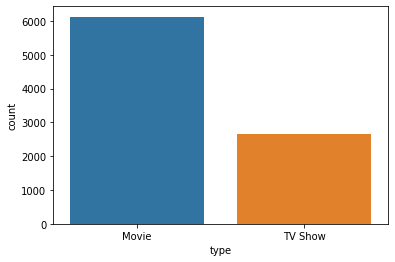

In [18]:
sns.countplot(x='type',data = df)

<AxesSubplot:xlabel='release_year', ylabel='count'>

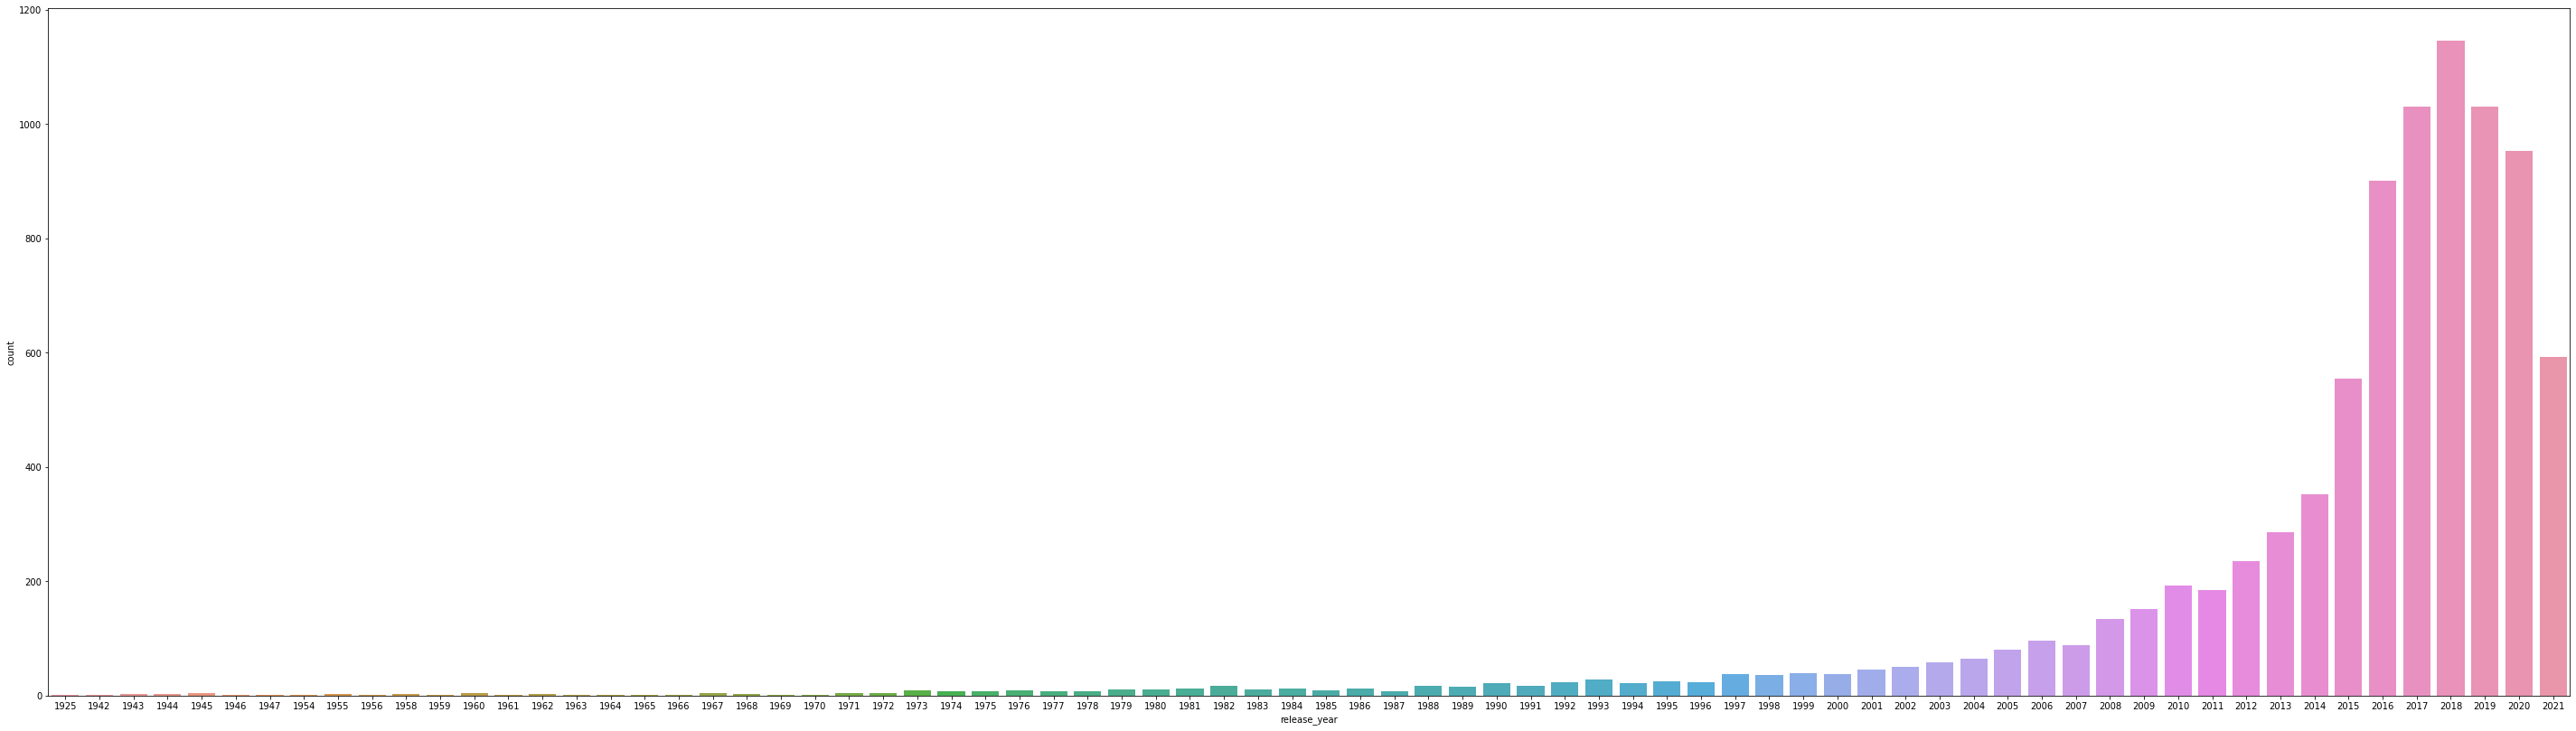

In [19]:
plt.figure(figsize = (50,14))
sns.countplot(x='release_year',data = df)

<AxesSubplot:xlabel='target_age', ylabel='count'>

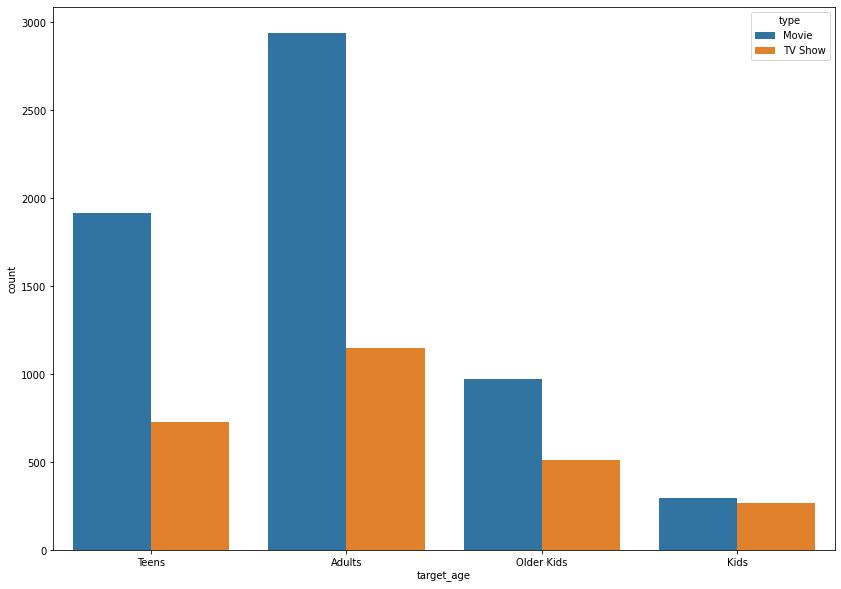

In [20]:
plt.figure(figsize = (14,10))
sns.countplot(x='target_age',data = df,hue='type')

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

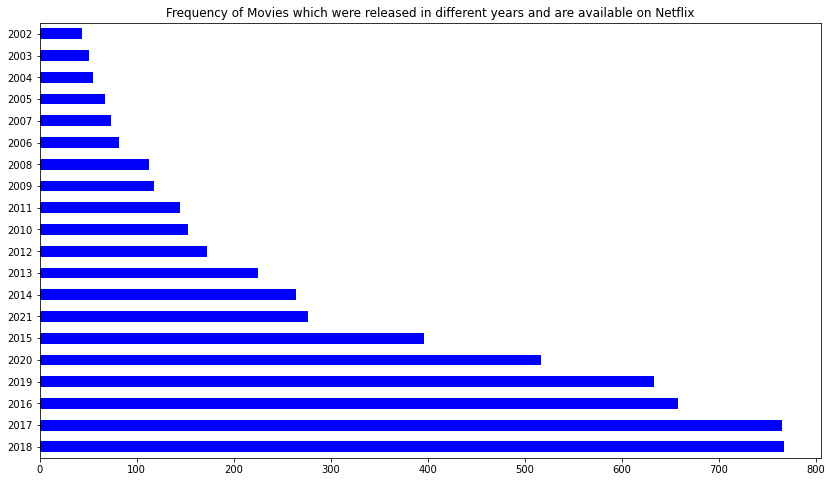

In [21]:
plt.figure(figsize=(14,8))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="barh",color="Blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

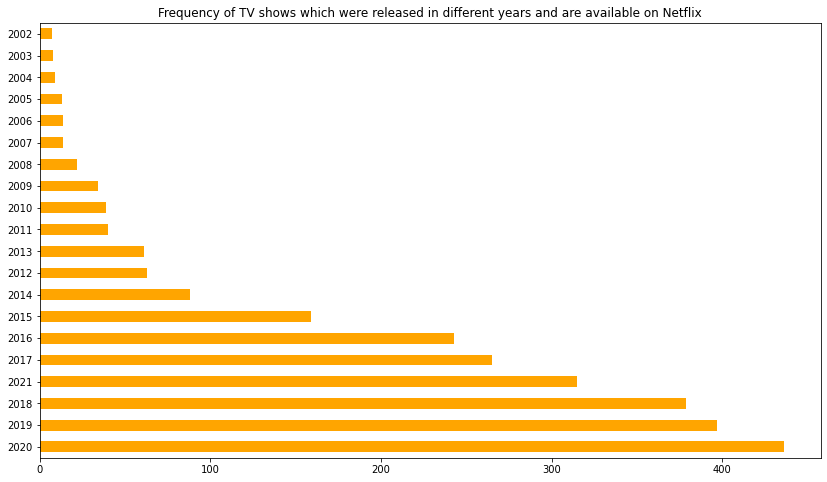

In [22]:
plt.figure(figsize=(14,8))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="barh",color="Orange")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

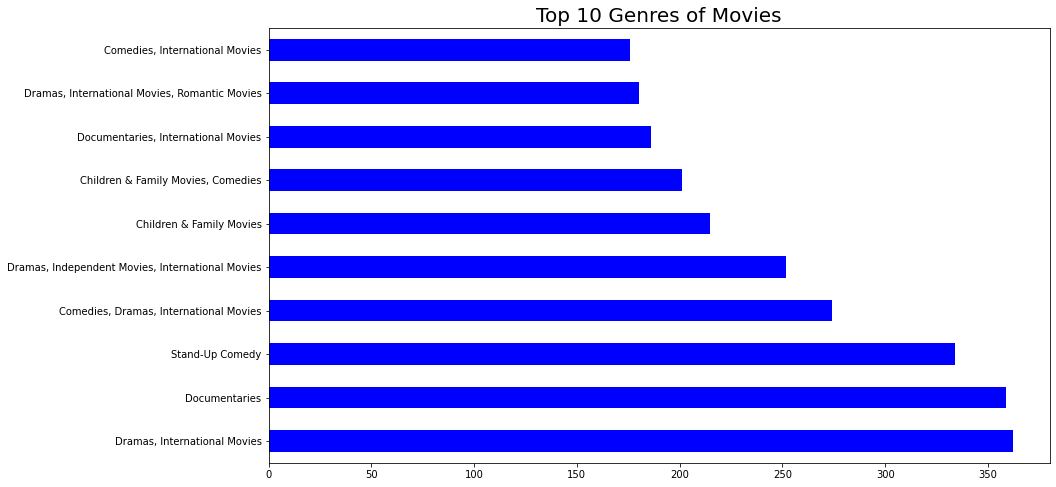

In [23]:
plt.figure(figsize=(14,8))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Blue")
plt.title("Top 10 Genres of Movies",size=20)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

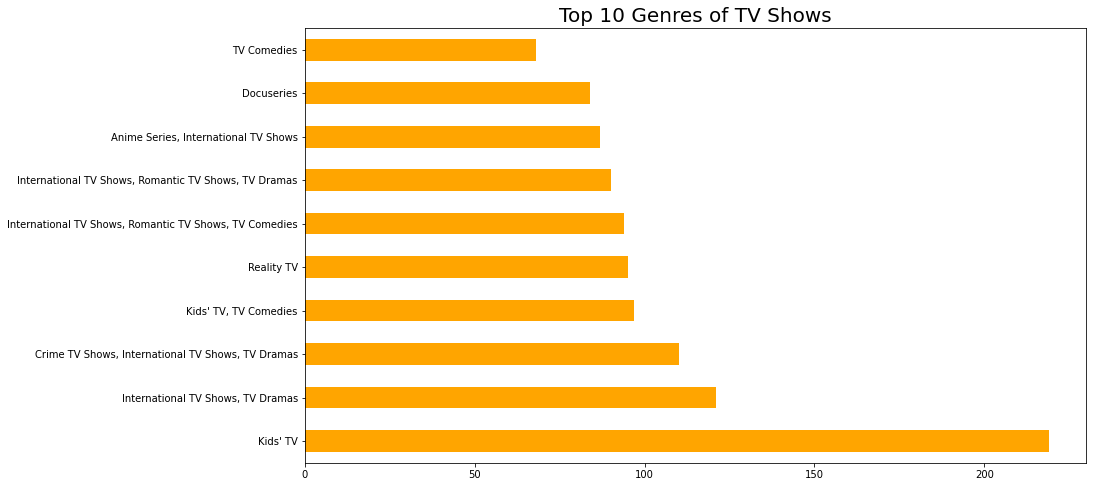

In [24]:
plt.figure(figsize=(14,8))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Orange")
plt.title("Top 10 Genres of TV Shows",size=20)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   date_added    8790 non-null   object
 4   release_year  8790 non-null   int64 
 5   rating        8790 non-null   object
 6   duration      8790 non-null   object
 7   listed_in     8790 non-null   object
 8   description   8790 non-null   object
 9   target_age    8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 1013.4+ KB
